# Алгоритм Дейкстри для знаходження оптимального місця для пожежної станції


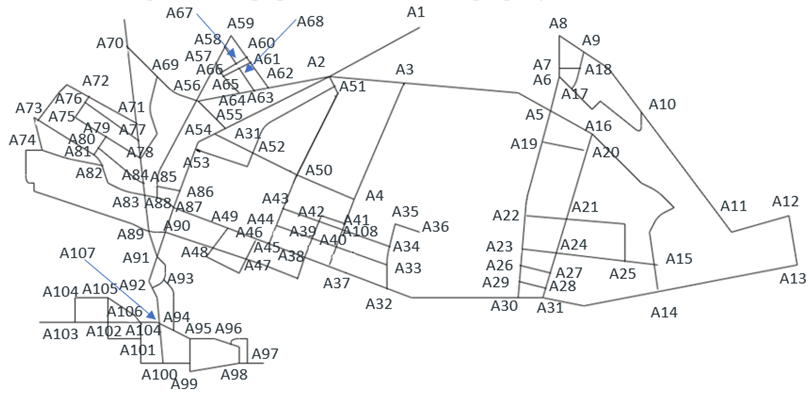

Ідея полягає в тому, щоб знайти мінімальний час доїзду до кожного з будинків, це повторити для кожної точки на графі, тобто теоретичного місця знаходження станції. Потім знайти суми мінімального часу доїзду до кожного з будинків  для кожної з точок. Точка, якій відповідає мінімальна сума і буде оптимальним місцем.

## 1. Cтворення класу, матриця суміжності

In [5]:
class Node:

    def __init__(self, data, indexloc=None):
        self.data = data
        self.index = indexloc


class Graph:

    @classmethod
    def create_from_nodes(self, nodes):
        return Graph(len(nodes), len(nodes), nodes)

    def __init__(self, row, col, nodes=None):

        self.adj_mat = [[0] * col for _ in range(row)]
        self.nodes = nodes
        for i in range(len(self.nodes)):
            self.nodes[i].index = i


    def connect_dir(self, node1, node2, weight=1):
        node1, node2 = self.get_index_from_node(node1), self.get_index_from_node(node2)
        self.adj_mat[node1][node2] = weight


    def connect(self, node1, node2, weight=1):
        self.connect_dir(node1, node2, weight)
        self.connect_dir(node2, node1, weight)


    def connections_from(self, node):
        node = self.get_index_from_node(node)
        return [(self.nodes[col_num], self.adj_mat[node][col_num]) for col_num in range(len(self.adj_mat[node])) if
                self.adj_mat[node][col_num] != 0]


    def connections_to(self, node):
        node = self.get_index_from_node(node)
        column = [row[node] for row in self.adj_mat]
        return [(self.nodes[row_num], column[row_num]) for row_num in range(len(column)) if column[row_num] != 0]

    def print_adj_mat(self):
        for row in self.adj_mat:
            print(row)

    def node(self, index):
        return self.nodes[index]

    def remove_conn(self, node1, node2):
        self.remove_conn_dir(node1, node2)
        self.remove_conn_dir(node2, node1)

    def remove_conn_dir(self, node1, node2):
        node1, node2 = self.get_index_from_node(node1), self.get_index_from_node(node2)
        self.adj_mat[node1][node2] = 0


    def can_traverse_dir(self, node1, node2):
        node1, node2 = self.get_index_from_node(node1), self.get_index_from_node(node2)
        return self.adj_mat[node1][node2] != 0

    def has_conn(self, node1, node2):
        return self.can_traverse_dir(node1, node2) or self.can_traverse_dir(node2, node1)

    def add_node(self, node):
        self.nodes.append(node)
        node.index = len(self.nodes) - 1
        for row in self.adj_mat:
            row.append(0)
        self.adj_mat.append([0] * (len(self.adj_mat) + 1))

    def get_weight(self, n1, n2):
        node1, node2 = self.get_index_from_node(n1), self.get_index_from_node(n2)
        return self.adj_mat[node1][node2]

    def get_index_from_node(self, node):
        if not isinstance(node, Node) and not isinstance(node, int):
            raise ValueError("node must be an integer or a Node object")
        if isinstance(node, int):
            return node
        else:
            return node.index

    def dijkstra(self, node):
        nodenum = self.get_index_from_node(node)

        dist = [None] * len(self.nodes)
        for i in range(len(dist)):
            dist[i] = [float("inf")]
            dist[i].append([self.nodes[nodenum]])

        dist[nodenum][0] = 0

        queue = [i for i in range(len(self.nodes))]

        seen = set()
        while len(queue) > 0:

            min_dist = float("inf")
            min_node = None
            for n in queue:
                if dist[n][0] < min_dist and n not in seen:
                    min_dist = dist[n][0]
                    min_node = n

            queue.remove(min_node)
            seen.add(min_node)
            connections = self.connections_from(min_node)
            for (node, weight) in connections:
                tot_dist = weight + min_dist
                if tot_dist < dist[node.index][0]:
                    dist[node.index][0] = tot_dist
                    dist[node.index][1] = list(dist[min_node][1])
                    dist[node.index][1].append(node)
        return dist

                       # Задаємо вершини
a1 = Node("A1")
a2 = Node("A2")
a3 = Node("A3")
a4 = Node("A4")
a5 = Node("A5")
a6 = Node("A6")
a7 = Node("A7")
a8 = Node("A8")
a9 = Node("A9")
a10 = Node("A10")
a11 = Node("A11")
a12 = Node("A12")
a13 = Node("A13")
a14 = Node("A14")
a15 = Node("A15")
a16 = Node("A16")
a17 = Node("A17")
a18 = Node("A18")
a19 = Node("A19")
a20 = Node("A20")
a21 = Node("A21")
a22 = Node("A22")
a23 = Node("A23")
a24 = Node("A24")
a25 = Node("A25")
a26 = Node("A26")
a27 = Node("A27")
a28 = Node("A28")
a29 = Node("A29")
a30 = Node("A30")
a31 = Node("A31")
a32 = Node("A32")
a33 = Node("A33")
a34 = Node("A34")
a35 = Node("A35")
a36 = Node("A36")
a37 = Node("A37")
a38 = Node("A38")
a39 = Node("A39")
a40 = Node("A40")
a41 = Node("A41")
a42 = Node("A42")
a43 = Node("A43")
a44 = Node("A44")
a45 = Node("A45")
a46 = Node("A46")
a47 = Node("A47")
a48 = Node("A48")
a49 = Node("A49")
a50 = Node("A50")
a51 = Node("A51")
a52 = Node("A52")
a53 = Node("A53")
a54 = Node("A54")
a55 = Node("A55")
a56 = Node("A56")
a57 = Node("A57")
a58 = Node("A58")
a59 = Node("A59")
a60 = Node("A60")
a61 = Node("A61")
a62 = Node("A62")
a63 = Node("A63")
a64 = Node("A64")
a65 = Node("A65")
a66 = Node("A66")
a67 = Node("A67")
a68 = Node("A68")
a69 = Node("A69")
a70 = Node("A70")
a71 = Node("A71")
a72 = Node("A72")
a73 = Node("A73")
a74 = Node("A74")
a75 = Node("A75")
a76 = Node("A76")
a77 = Node("A77")
a78 = Node("778")
a79 = Node("779")
a80 = Node("A80")
a81 = Node("A81")
a82 = Node("A82")
a83 = Node("A83")
a84 = Node("A84")
a85 = Node("A85")
a86 = Node("A86")
a87 = Node("A87")
a88 = Node("788")
a89 = Node("789")
a90 = Node("A90")
a91 = Node("A91")
a92 = Node("A92")
a93 = Node("A93")
a94 = Node("A94")
a95 = Node("A95")
a96 = Node("A96")
a97 = Node("A97")
a98 = Node("A98")
a99 = Node("A99")
a100 = Node("A100")
a101 = Node("A101")
a102 = Node("A102")
a103 = Node("A103")
a104 = Node("A104")
a105 = Node("A105")
a106 = Node("A106")
a107 = Node("A107")
a108 = Node("A108")
                              # Створюєм об'єкт - граф
graph = Graph.create_from_nodes([a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20,
                                   a21, a22, a23, a24, a25, a26, a27, a28, a29, a30, a31, a32, a33, a34, a35, a36, a37, a38, a39, a40,
                                   a41, a42, a43, a44, a45, a46, a47, a48, a49, a50, a51, a52, a53, a54, a55, a56, a57, a58, a59, a60,
                                   a61, a62, a63, a64, a65, a66, a67, a68, a69, a70, a71, a72, a73, a74, a75, a76, a77, a78, a79, a80,
                                   a81, a82, a83, a84, a85, a86, a87, a88, a89, a90, a91, a92, a93, a94, a95, a96, a97, a98, a99, a100,
                                   a101, a102, a103, a104, a105, a106, a107, a108])

                  # З'єднуєм вершини - для матриці суміжності
graph.connect(a1, a2)
graph.connect(a2, a62)
graph.connect(a2, a3)
graph.connect(a2, a51)
graph.connect(a3, a4)
graph.connect(a3, a5)
graph.connect(a4, a41)
graph.connect(a4, a50)
graph.connect(a5, a6)
graph.connect(a5, a19)
graph.connect(a5, a16)
graph.connect(a6, a7)
graph.connect(a6, a17)
graph.connect(a7, a8)
graph.connect(a7, a18)
graph.connect(a8, a9)
graph.connect(a9, a18)
graph.connect(a9, a10)
graph.connect(a10, a17)
graph.connect(a10, a11)
graph.connect(a11, a12)
graph.connect(a12, a13)
graph.connect(a13, a14)
graph.connect(a14, a15)
graph.connect(a14, a31)
graph.connect(a15, a25)
graph.connect(a15, a16)
graph.connect(a16, a20)
graph.connect(a17, a18)
graph.connect(a19, a20)
graph.connect(a19, a22)
graph.connect(a20, a21)
graph.connect(a21, a22)
graph.connect(a21, a24)
graph.connect(a21, a25)
graph.connect(a22, a23)
graph.connect(a23, a24)
graph.connect(a23, a26)
graph.connect(a24, a27)
graph.connect(a24, a25)
graph.connect(a26, a27)
graph.connect(a26, a29)
graph.connect(a27, a28)
graph.connect(a28, a29)
graph.connect(a28, a31)
graph.connect(a29, a30)
graph.connect(a30, a31)
graph.connect(a30, a32)
graph.connect(a32, a33)
graph.connect(a32, a37)
graph.connect(a33, a34)
graph.connect(a33, a40)
graph.connect(a34, a35)
graph.connect(a34, a108)
graph.connect(a35, a36)
graph.connect(a37, a38)
graph.connect(a37, a40)
graph.connect(a38, a39)
graph.connect(a38, a45)
graph.connect(a38, a47)
graph.connect(a39, a40)
graph.connect(a39, a42)
graph.connect(a39, a44)
graph.connect(a40, a108)
graph.connect(a41, a108)
graph.connect(a41, a42)
graph.connect(a42, a108)
graph.connect(a42, a43)
graph.connect(a43, a44)
graph.connect(a43, a50)
graph.connect(a44, a45)
graph.connect(a45, a46)
graph.connect(a46, a47)
graph.connect(a46, a49)
graph.connect(a47, a48)
graph.connect(a48, a49)
graph.connect(a48, a90)
graph.connect(a49, a87)
graph.connect(a50, a51)
graph.connect(a50, a52)
graph.connect(a51, a52)
graph.connect(a52, a53)
graph.connect(a52, a54)
graph.connect(a53, a54)
graph.connect(a53, a86)
graph.connect(a54, a55)
graph.connect(a55, a56)
graph.connect(a56, a85)
graph.connect(a56, a57)
graph.connect(a56, a64)
graph.connect(a56, a69)
graph.connect(a57, a58)
graph.connect(a57, a66)
graph.connect(a58, a59)
graph.connect(a58, a67)
graph.connect(a59, a60)
graph.connect(a60, a67)
graph.connect(a60, a61)
graph.connect(a61, a62)
graph.connect(a61, a68)
graph.connect(a62, a63)
graph.connect(a63, a68)
graph.connect(a63, a64)
graph.connect(a64, a65)
graph.connect(a65, a66)
graph.connect(a65, a68)
graph.connect(a66, a67)
graph.connect(a69, a70)
graph.connect(a69, a78)
graph.connect(a70, a71)
graph.connect(a71, a72)
graph.connect(a71, a77)
graph.connect(a72, a73)
graph.connect(a72, a76)
graph.connect(a73, a74)
graph.connect(a73, a81)
graph.connect(a74, a82)
graph.connect(a74, a89)
graph.connect(a75, a76)
graph.connect(a75, a79)
graph.connect(a76, a77)
graph.connect(a77, a78)
graph.connect(a78, a79)
graph.connect(a78, a84)
graph.connect(a79, a80)
graph.connect(a80, a81)
graph.connect(a80, a84)
graph.connect(a81, a82)
graph.connect(a82, a83)
graph.connect(a83, a84)
graph.connect(a83, a88)
graph.connect(a83, a89)
graph.connect(a85, a86)
graph.connect(a85, a88)
graph.connect(a86, a87)
graph.connect(a87, a88)
graph.connect(a87, a90)
graph.connect(a89, a90)
graph.connect(a89, a91)
graph.connect(a90, a91)
graph.connect(a91, a92)
graph.connect(a91, a93)
graph.connect(a92, a93)
graph.connect(a92, a107)
graph.connect(a93, a94)
graph.connect(a94, a95)
graph.connect(a94, a107)
graph.connect(a95, a96)
graph.connect(a95, a99)
graph.connect(a96, a97)
graph.connect(a96, a98)
graph.connect(a97, a98)
graph.connect(a98, a99)
graph.connect(a99, a100)
graph.connect(a100, a107)
graph.connect(a100, a101)
graph.connect(a101, a102)
graph.connect(a101, a106)
graph.connect(a102, a103)
graph.connect(a102, a105)
graph.connect(a102, a106)
graph.connect(a103, a104)
graph.connect(a104, a105)
graph.connect(a105, a106)
graph.connect(a106, a107)

print('Матриця суміжності')
graph.print_adj_mat()


Матриця суміжності
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0,

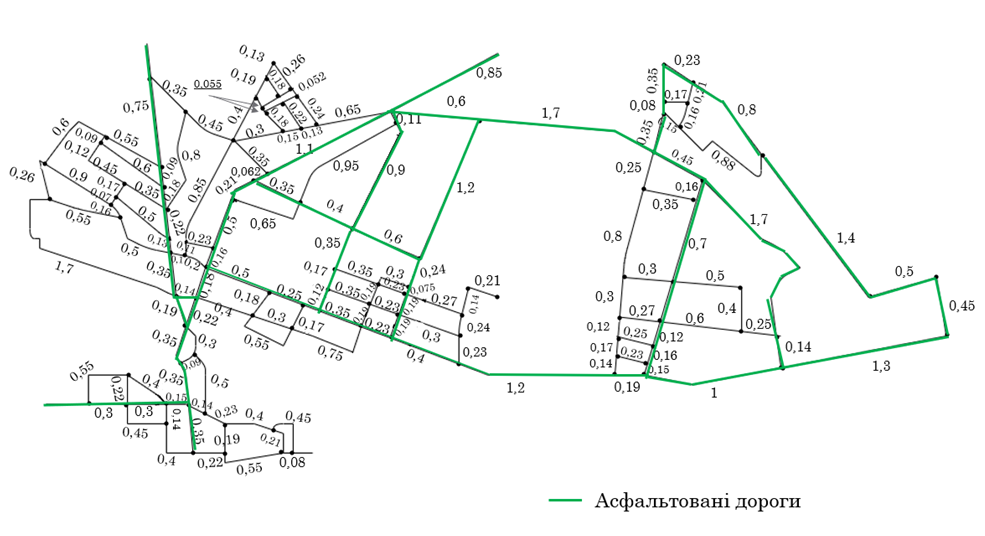


## Матриця часу проїзду пожежного автомобіля по ребрі графа (матриця відстані помножена на коефіцієнти)

Зауваження: Час розраховується у годинах

In [6]:
w_graph = Graph.create_from_nodes([a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20,
                                   a21, a22, a23, a24, a25, a26, a27, a28, a29, a30, a31, a32, a33, a34, a35, a36, a37, a38, a39, a40,
                                   a41, a42, a43, a44, a45, a46, a47, a48, a49, a50, a51, a52, a53, a54, a55, a56, a57, a58, a59, a60,
                                   a61, a62, a63, a64, a65, a66, a67, a68, a69, a70, a71, a72, a73, a74, a75, a76, a77, a78, a79, a80,
                                   a81, a82, a83, a84, a85, a86, a87, a88, a89, a90, a91, a92, a93, a94, a95, a96, a97, a98, a99, a100,
                                   a101, a102, a103, a104, a105, a106, a107, a108])

w_graph.connect(a1, a2, round(0.85/45, 6))
w_graph.connect(a2, a62, round(0.65/30, 6))
w_graph.connect(a2, a3, round(0.6/45, 6))
w_graph.connect(a2, a51, round(0.11/45, 6))
w_graph.connect(a3, a4, round(1.2/45, 6))
w_graph.connect(a3, a5, round(1.7/45, 6))
w_graph.connect(a4, a41, round(0.24/45, 6))
w_graph.connect(a4, a50, round(0.6/45, 6))
w_graph.connect(a5, a6, round(0.35/45, 6))
w_graph.connect(a5, a19, round(0.25/30, 6))
w_graph.connect(a5, a16, round(0.45/45, 6))
w_graph.connect(a6, a17, round(0.35/45, 6))
w_graph.connect(a6, a7, round(0.08/45, 6))
w_graph.connect(a7, a8, round(0.35/45, 6))
w_graph.connect(a7, a18, round(0.17/30, 6))
w_graph.connect(a8, a9, round(0.23/45, 6))
w_graph.connect(a9, a18, round(0.21/30, 6))
w_graph.connect(a9, a10, round(0.8/45, 6))
w_graph.connect(a10, a17, round(0.88/30, 6))
w_graph.connect(a10, a11, round(1.4/45, 6))
w_graph.connect(a11, a12, round(0.5/45, 6))
w_graph.connect(a12, a13, round(0.45/45, 6))
w_graph.connect(a13, a14, round(1.3/45, 6))
w_graph.connect(a14, a15, round(0.14/45, 6))
w_graph.connect(a14, a31, round(1/45, 6))
w_graph.connect(a15, a25, round(0.25/30, 6))
w_graph.connect(a15, a16, round(1.7/45, 6))
w_graph.connect(a16, a20, round(0.16/45, 6))
w_graph.connect(a17, a18, round(0.16/30, 6))
w_graph.connect(a19, a20, round(0.35/30, 6))
w_graph.connect(a19, a22, round(0.8/30, 6))
w_graph.connect(a20, a21, round(0.7/45, 6))
w_graph.connect(a21, a22, round(0.27/30, 6))
w_graph.connect(a21, a24, round(0.35/45, 6))
w_graph.connect(a21, a25, round(0.9/30, 6))
w_graph.connect(a22, a23, round(0.3/30, 6))
w_graph.connect(a23, a24, round(0.27/30, 6))
w_graph.connect(a23, a26, round(0.12/30, 6))
w_graph.connect(a24, a27, round(0.12/45, 6))
w_graph.connect(a24, a25, round(0.6/30, 6))
w_graph.connect(a26, a27, round(0.25/30, 6))
w_graph.connect(a26, a29, round(0.17/30, 6))
w_graph.connect(a27, a28, round(0.16/45, 6))
w_graph.connect(a28, a29, round(0.23/30, 6))
w_graph.connect(a28, a31, round(0.15/45, 6))
w_graph.connect(a29, a30, round(0.14/30, 6))
w_graph.connect(a30, a31, round(0.19/45, 6))
w_graph.connect(a30, a32, round(1.2/45, 6))
w_graph.connect(a32, a33, round(0.25/30, 6))
w_graph.connect(a32, a37, round(0.4/45, 6))
w_graph.connect(a33, a34, round(0.24/30, 6))
w_graph.connect(a33, a40, round(0.3/30, 6))
w_graph.connect(a34, a35, round(0.14/30, 6))
w_graph.connect(a34, a108, round(0.27/30, 6))
w_graph.connect(a35, a36, round(0.21/30, 6))
w_graph.connect(a37, a38, round(0.23/45, 6))
w_graph.connect(a37, a40, round(0.19/45, 6))
w_graph.connect(a38, a39, round(0.19/30, 6))
w_graph.connect(a38, a45, round(0.35/45, 6))
w_graph.connect(a38, a47, round(0.75/30, 6))
w_graph.connect(a39, a40, round(0.23/30, 6))
w_graph.connect(a39, a42, round(0.19/30, 6))
w_graph.connect(a39, a44, round(0.35/30, 6))
w_graph.connect(a40, a108, round(0.19/45, 6))
w_graph.connect(a41, a108, round(0.075/45, 6))
w_graph.connect(a41, a42, round(0.3/30, 6))
w_graph.connect(a42, a108, round(0.23/30, 6))
w_graph.connect(a42, a43, round(0.35/30, 6))
w_graph.connect(a43, a44, round(0.17/45, 6))
w_graph.connect(a43, a50, round(0.35/45, 6))
w_graph.connect(a44, a45, round(0.12/45, 6))
w_graph.connect(a45, a46, round(0.1/45, 6))
w_graph.connect(a46, a47, round(0.17/30, 6))
w_graph.connect(a46, a49, round(0.25/45, 6))
w_graph.connect(a47, a48, round(0.3/30, 6))
w_graph.connect(a48, a49, round(0.18/30, 6))
w_graph.connect(a48, a90, round(0.4/30, 6))
w_graph.connect(a49, a87, round(0.5/45, 6))
w_graph.connect(a50, a51, round(0.9/45, 6))
w_graph.connect(a50, a52, round(0.4/45, 6))
w_graph.connect(a51, a52, round(0.95/30, 6))
w_graph.connect(a52, a53, round(0.65/30, 6))
w_graph.connect(a52, a54, round(0.35/45, 6))
w_graph.connect(a53, a54, round(0.21/45, 6))
w_graph.connect(a53, a86, round(0.5/45, 6))
w_graph.connect(a54, a55, round(0.062/45, 6))
w_graph.connect(a55, a56, round(0.35/30, 6))
w_graph.connect(a56, a85, round(0.85/30, 6))
w_graph.connect(a56, a57, round(0.4/30, 6))
w_graph.connect(a56, a64, round(0.3/30, 6))
w_graph.connect(a56, a69, round(0.45/30, 6))
w_graph.connect(a57, a58, round(0.19/30, 6))
w_graph.connect(a57, a66, round(0.055/30, 6))
w_graph.connect(a58, a59, round(0.13/30, 6))
w_graph.connect(a58, a67, round(0.18/30, 6))
w_graph.connect(a59, a60, round(0.26/30, 6))
w_graph.connect(a60, a67, round(0.12/30, 6))
w_graph.connect(a60, a61, round(0.052/30, 6))
w_graph.connect(a61, a62, round(0.24/30, 6))
w_graph.connect(a61, a68, round(0.12/30, 6))
w_graph.connect(a62, a63, round(0.13/30, 6))
w_graph.connect(a63, a68, round(0.22/30, 6))
w_graph.connect(a63, a64, round(0.15/30, 6))
w_graph.connect(a64, a65, round(0.18/30, 6))
w_graph.connect(a65, a66, round(0.055/30, 6))
w_graph.connect(a65, a68, round(0.12/30, 6))
w_graph.connect(a66, a67, round(0.12/30, 6))
w_graph.connect(a69, a70, round(0.35/30, 6))
w_graph.connect(a69, a78, round(0.8/30, 6))
w_graph.connect(a70, a71, round(0.75/45, 6))
w_graph.connect(a71, a72, round(0.55/30, 6))
w_graph.connect(a71, a77, round(0.09/45, 6))
w_graph.connect(a72, a73, round(0.6/30, 6))
w_graph.connect(a72, a76, round(0.09/30, 6))
w_graph.connect(a73, a74, round(0.26/30, 6))
w_graph.connect(a73, a81, round(0.9/30, 6))
w_graph.connect(a74, a82, round(0.55/30, 6))
w_graph.connect(a74, a89, round(1.7/30, 6))
w_graph.connect(a75, a76, round(0.12/30, 6))
w_graph.connect(a75, a79, round(0.45/30, 6))
w_graph.connect(a76, a77, round(0.6/30, 6))
w_graph.connect(a77, a78, round(0.18/45, 6))
w_graph.connect(a78, a79, round(0.35/30, 6))
w_graph.connect(a78, a84, round(0.22/45, 6))
w_graph.connect(a79, a80, round(0.17/30, 6))
w_graph.connect(a80, a81, round(0.07/30, 6))
w_graph.connect(a80, a84, round(0.5/30, 6))
w_graph.connect(a81, a82, round(0.16/30, 6))
w_graph.connect(a82, a83, round(0.5/30, 6))
w_graph.connect(a83, a84, round(0.13/45, 6))
w_graph.connect(a83, a88, round(0.1/30, 6))
w_graph.connect(a83, a89, round(0.35/45, 6))
w_graph.connect(a85, a86, round(0.23/30, 6))
w_graph.connect(a85, a88, round(0.11/30, 6))
w_graph.connect(a86, a87, round(0.16/45, 6))
w_graph.connect(a87, a88, round(0.2/30, 6))
w_graph.connect(a87, a90, round(0.18/45, 6))
w_graph.connect(a89, a90, round(0.14/45, 6))
w_graph.connect(a89, a91, round(0.19/45, 6))
w_graph.connect(a90, a91, round(0.22/45, 6))
w_graph.connect(a91, a92, round(0.35/45, 6))
w_graph.connect(a91, a93, round(0.3/30, 6))
w_graph.connect(a92, a93, round(0.09/30, 6))
w_graph.connect(a92, a107, round(0.35/45, 6))
w_graph.connect(a93, a94, round(0.5/30, 6))
w_graph.connect(a94, a95, round(0.23/30, 6))
w_graph.connect(a94, a107, round(0.14/30, 6))
w_graph.connect(a95, a96, round(0.4/30, 6))
w_graph.connect(a95, a99, round(0.19/30, 6))
w_graph.connect(a96, a97, round(0.45/30, 6))
w_graph.connect(a96, a98, round(0.21/30, 6))
w_graph.connect(a97, a98, round(0.08/30, 6))
w_graph.connect(a98, a99, round(0.55/30, 6))
w_graph.connect(a99, a100, round(0.22/30, 6))
w_graph.connect(a100, a107, round(0.35/45, 6))
w_graph.connect(a100, a101, round(0.4/30, 6))
w_graph.connect(a101, a102, round(0.45/30, 6))
w_graph.connect(a101, a106, round(0.14/30, 6))
w_graph.connect(a102, a103, round(0.3/45, 6))
w_graph.connect(a102, a105, round(0.22/30, 6))
w_graph.connect(a102, a106, round(0.3/45, 6))
w_graph.connect(a103, a104, round(0.25/30, 6))
w_graph.connect(a104, a105, round(0.3/30, 6))
w_graph.connect(a105, a106, round(0.4/30, 6))
w_graph.connect(a106, a107, round(0.15/45, 6))

w_graph.print_adj_mat()


[0, 0.018889, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.018889, 0, 0.013333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002444, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.021667, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0.013333, 0, 0.026667, 0.037778, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Фінальний етап - пошук сум для кожної точки на графі

In [14]:
def find_sum(a):
    sum = 0
    list = [weight for (weight, node) in w_graph.dijkstra(a)]
    for i in range(len(list)):
        sum += list[i]
    return sum
summm = []
num = 1
print('Отримані суми у годинах: ')
for el in [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20,
                                   a21, a22, a23, a24, a25, a26, a27, a28, a29, a30, a31, a32, a33, a34, a35, a36, a37, a38, a39, a40,
                                   a41, a42, a43, a44, a45, a46, a47, a48, a49, a50, a51, a52, a53, a54, a55, a56, a57, a58, a59, a60,
                                   a61, a62, a63, a64, a65, a66, a67, a68, a69, a70, a71, a72, a73, a74, a75, a76, a77, a78, a79, a80,
                                   a81, a82, a83, a84, a85, a86, a87, a88, a89, a90, a91, a92, a93, a94, a95, a96, a97, a98, a99, a100,
                                   a101, a102, a103, a104, a105, a106, a107, a108]:
    print('a'+ str(num)+ ':',  find_sum(el))
    summm.append(find_sum(el))
    num += 1

print('Оптимальна точка:')    
print('a45:', min(summm))    

Отримані суми у годинах: 
a1: 9.119861000000006
a2: 7.1176270000000015
a3: 7.574731000000004
a4: 6.456614000000003
a5: 9.622638000000002
a6: 10.319546999999996
a7: 10.483123000000003
a8: 11.229587000000002
a9: 11.687931000000003
a10: 13.448059999999998
a11: 14.226298000000003
a12: 13.631883999999994
a13: 12.837104
a14: 10.043764000000003
a15: 10.204575999999998
a16: 9.912834
a17: 11.081562999999996
a18: 11.015931000000007
a19: 10.322615000000003
a20: 9.824160999999998
a21: 9.177241
a22: 9.595788000000002
a23: 9.033847000000003
a24: 8.764392000000003
a25: 10.665255000000004
a26: 8.742234000000003
a27: 8.619878000000002
a28: 8.401479
a29: 8.299666000000002
a30: 7.908402999999997
a31: 8.176389000000002
a32: 6.468384999999999
a33: 6.866989000000004
a34: 6.970697000000004
a35: 7.4560650000000015
a36: 8.198065000000001
a37: 6.000254999999999
a38: 5.838368999999999
a39: 6.2362430000000035
a40: 6.1436579999999985
a41: 6.314708000000003
a42: 6.36089
a43: 5.774429999999999
a44: 5.674493000000003

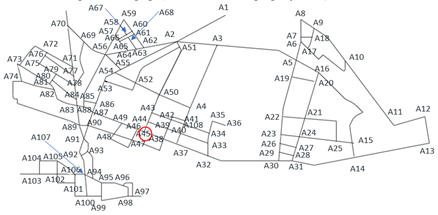


In [29]:
print('Оптимальний маршрут руху та приблизний час доїзду(у хв.) до кожного будинку')
for (weight, node) in w_graph.dijkstra(a45):

    print('\n'+str((weight*60, [n.data for n in node])))

Оптимальний маршрут руху та приблизний час доїзду(у хв.) до кожного будинку

(3.3333600000000003, ['A45', 'A44', 'A43', 'A50', 'A51', 'A2', 'A1'])

(2.2000200000000003, ['A45', 'A44', 'A43', 'A50', 'A51', 'A2'])

(3.0, ['A45', 'A44', 'A43', 'A50', 'A51', 'A2', 'A3'])

(1.6533599999999997, ['A45', 'A44', 'A43', 'A50', 'A4'])

(5.26668, ['A45', 'A44', 'A43', 'A50', 'A51', 'A2', 'A3', 'A5'])

(5.73336, ['A45', 'A44', 'A43', 'A50', 'A51', 'A2', 'A3', 'A5', 'A6'])

(5.84004, ['A45', 'A44', 'A43', 'A50', 'A51', 'A2', 'A3', 'A5', 'A6', 'A7'])

(6.30672, ['A45', 'A44', 'A43', 'A50', 'A51', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8'])

(6.600060000000001, ['A45', 'A44', 'A43', 'A50', 'A51', 'A2', 'A3', 'A5', 'A6', 'A7', 'A18', 'A9'])

(7.66674, ['A45', 'A44', 'A43', 'A50', 'A51', 'A2', 'A3', 'A5', 'A6', 'A7', 'A18', 'A9', 'A10'])

(7.49334, ['A45', 'A38', 'A37', 'A32', 'A30', 'A31', 'A14', 'A13', 'A12', 'A11'])

(6.8266800000000005, ['A45', 'A38', 'A37', 'A32', 'A30', 'A31', 'A14', 'A13', 'A12'])

(6.2